In [21]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [1]:
import nltk
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

# Correct path to the file
file_path = r"C:\Users\DELL\Desktop\RD internship\archive\Genre Classification Dataset\train_data.txt"

# Read the file
df = pd.read_csv(
    file_path,
    sep=':::',  # Adjust this if the delimiter is different
    names=["Movie_name", "Genre", "Description"],
    engine="python",
    encoding='utf-8'  # Adjust encoding if necessary
)

# Display the first few rows
print(df.head())



                           Movie_name       Genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         Description  
1   Listening in to a conversation between his do...  
2   A brother and sister with a past incestuous r...  
3   As the bus empties the students for their fie...  
4   To help their unemployed father make ends mee...  
5   The film's title refers not only to the un-re...  


In [10]:
df.head(5)

,Movie_name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [12]:
df.describe()

,Movie_name,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [5]:
df.isnull().sum()

Movie_name     0
Gener          0
Description    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   54214 non-null  object
 1   Gener        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
df['Gener'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [8]:
df['Gener'].value_counts()   

Gener
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [9]:
df=df[:14000]

In [10]:
df['Gener'].isnull().sum(),df['Description'].isnull().sum()

(0, 0)

In [11]:
Gener_col = df['Gener'].value_counts()

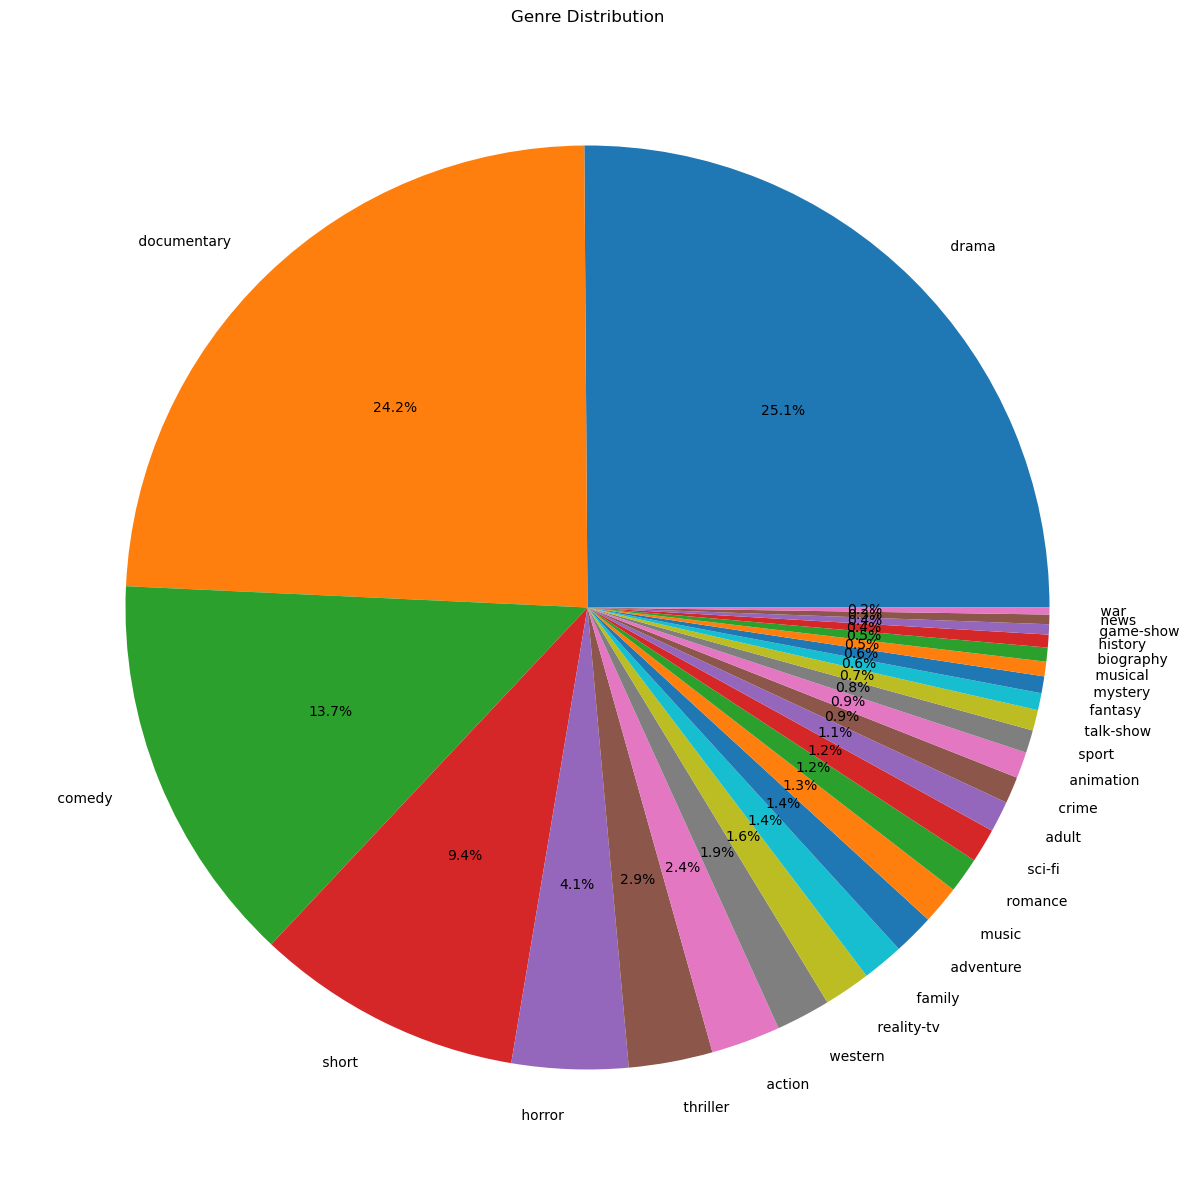

In [16]:
import matplotlib.pyplot as plt

# Ensure column name matches the DataFrame
plt.figure(figsize=(15, 15))
plt.pie(
    df['Genre'].value_counts(), 
    labels=df['Genre'].value_counts().index, 
    autopct='%0.1f%%'
)
plt.title("Genre Distribution")
plt.show()


In [13]:
def remove_punct(text):
    import string as st
    punct=st.punctuation
    new_text=''.join([char for char in text if char not in punct])
    return new_text

df['Description']=df['Description'].apply(lambda x:remove_punct(x))

In [18]:
df.tail()

,Movie_name,Genre,Description
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [15]:
df['Description']=df['Description'].apply(lambda x:x.lower())
df.head()

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,the films title refers not only to the unreco...


In [16]:
def toknize(text):
    from nltk.tokenize import word_tokenize
    new_text=word_tokenize(text)
    return new_text
df['Description']=df['Description'].apply(lambda x:toknize(x))

In [17]:
df.head(5)

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,"[listening, in, to, a, conversation, between, ..."
2,Cupid (1997),thriller,"[a, brother, and, sister, with, a, past, inces..."
3,"Young, Wild and Wonderful (1980)",adult,"[as, the, bus, empties, the, students, for, th..."
4,The Secret Sin (1915),drama,"[to, help, their, unemployed, father, make, en..."
5,The Unrecovered (2007),drama,"[the, films, title, refers, not, only, to, the..."


In [18]:
def stemming(text):
    from nltk import PorterStemmer
    ps=PorterStemmer().stem
    # dir(PorterStemmer())
    new_text=" ".join([ps(word) for word in text ]) 
    return new_text
df['Description']=df['Description'].apply(lambda x : stemming(x))

In [19]:
df.head(5) 

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,listen in to a convers between hi doctor and p...
2,Cupid (1997),thriller,a brother and sister with a past incestu relat...
3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...
4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...
5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...


In [22]:
# No conversion to dense DataFrame
print("Sparse matrix shape:", Description_tf_idf.shape)
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(max_features=10000)  # Limit vocabulary size
Description_tf_idf = tf_idf.fit_transform(df['Description'])

print("Reduced sparse matrix shape:", Description_tf_idf.shape)
import pandas as pd

# Define chunk size
chunk_size = 10000
columns = tf_idf.get_feature_names_out()

# Process in chunks
for start in range(0, Description_tf_idf.shape[0], chunk_size):
    chunk = Description_tf_idf[start:start+chunk_size].toarray()
    chunk_df = pd.DataFrame(chunk, columns=columns)
    # Save or process the chunk
    print(f"Processed rows {start} to {start + chunk_size}")
tf_idf = TfidfVectorizer(min_df=0.01, max_df=0.9)  # Remove rare and overly frequent terms
Description_tf_idf = tf_idf.fit_transform(df['Description'])

print("Filtered sparse matrix shape:", Description_tf_idf.shape)
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)  # Reduce to 100 dimensions
Description_tf_idf_reduced = svd.fit_transform(Description_tf_idf)

print("Reduced dense matrix shape:", Description_tf_idf_reduced.shape)


Sparse matrix shape: (54214, 121110)
Reduced sparse matrix shape: (54214, 10000)
Processed rows 0 to 10000
Processed rows 10000 to 20000
Processed rows 20000 to 30000
Processed rows 30000 to 40000
Processed rows 40000 to 50000
Processed rows 50000 to 60000
Filtered sparse matrix shape: (54214, 980)
Reduced dense matrix shape: (54214, 100)


In [23]:
df['Description len']=df['Description'].apply(lambda x:len(x)-x.count(' '))
df.head(10)

,Movie_name,Genre,Description,Description len
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,454
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,152
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,536
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,890
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,519
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,1351
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,282
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,273
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",374
10,Spirits (2014/I),horror,Four high school students embark on a terrify...,360


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Description_len_sclr'] = scaler.fit_transform(df['Description len'].values.reshape(-1, 1))
df.head(5) 

,Movie_name,Gener,Description,Description len,Description_len_sclr
1,Oscar et la dame rose (2009),drama,listen in to a convers between hi doctor and p...,390,0.047919
2,Cupid (1997),thriller,a brother and sister with a past incestu relat...,142,0.014631
3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...,457,0.056913
4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...,794,0.102148
5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...,451,0.056107


In [26]:
# Ensure correct column names
target = df['Genre']  # Use the corrected column name for the target variable

# Drop unnecessary columns
feature = df.drop(['Genre', 'Movie_name', 'Description', 'Description len'], axis=1, errors='ignore')

# Check the shape of the features and target
print("Feature shape:", feature.shape)
print("Target shape:", target.shape)


Feature shape: (54214, 0)
Target shape: (54214,)


In [28]:
target

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: Genre, Length: 54214, dtype: object

In [30]:
feature

""
1
2
3
4
5
...
54210
54211
54212
54213


In [32]:
target.shape , feature.shape

((54214,), (54214, 0))

In [38]:
import pandas as pd

# Convert sparse matrix to DataFrame
Description_tf_idf_df = pd.DataFrame(Description_tf_idf.toarray(), columns=tf_idf.get_feature_names_out())

# View the first few rows
Description_tf_idf_df.head()


,000,10,20,30,abandoned,able,about,accident,across,act,...,wrong,year,years,yet,york,you,young,younger,your,youth
0,0.0,0.186832,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.123294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.049593,0.0,0.08379,0.0,...,0.096166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
print(feature.shape)
print(Description_tf_idf.shape)

(54214, 0)
(54214, 980)


In [29]:
feature.reset_index(drop=True, inplace=True)
Description_tf_idf.reset_index(drop=True, inplace=True)
feature = pd.concat([feature, pd.DataFrame(Description_tf_idf)], axis=1)

In [42]:
feature.shape

(54214, 0)

In [44]:
feature.head()

""
1
2
3
4
5


In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.2)

In [33]:
print('x_train:',x_train.shape,'x_test:',x_test.shape,'y_train:',y_train.shape,'y_test:',y_test.shape)

x_train: (11200, 50501) x_test: (2800, 50501) y_train: (11200,) y_test: (2800,)


In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

In [35]:
model=RandomForestClassifier(n_estimators=150,max_depth=50)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'Description' is the text column and 'Genre' is the target
X = df['Description']  # Features (text)
y = df['Genre']        # Target (genre)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
tf_idf = TfidfVectorizer()
x_train_tfidf = tf_idf.fit_transform(x_train)
x_test_tfidf = tf_idf.transform(x_test)

# Define the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(x_train_tfidf, y_train)

# You can now make predictions, evaluate the model, etc.


LogisticRegression(max_iter=1000)

In [37]:
model.score(x_train,y_train)

0.958125

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame with 'Description' (features) and 'Genre' (target)
X = df['Description']  # Features (text)
y = df['Genre']        # Target (genre)

# Split the data into training and test sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tf_idf = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
x_train_tfidf = tf_idf.fit_transform(x_train)
x_test_tfidf = tf_idf.transform(x_test)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Print results
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.47726643917734946


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.80      0.04      0.07       112
   adventure        0.83      0.04      0.07       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.24      0.33      1443
       crime        1.00      0.01      0.02       107
 documentary        0.54      0.90      0.67      2659
       drama        0.41      0.83      0.55      2697
      family        1.00      0.03      0.05       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.20      0.33        40
     history        0.00      0.00      0.00        45
      horror        0.77      0.06      0.10       431
       music        0.75      0.06      0.12       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
